# Mid Circuit Measurement 4 classes Debug

In [1]:
import torch
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from data_utils import mnist_preparation 
from evaluationUtils import calculate_mcm_accuracy
from tqdm import tqdm
import matplotlib as plt
from OriginalModel import FullQuantumModel, QuantumCircuit
from mcmModel import MCMQuantumModel, MCMCircuit
from pennylane import Device
from pennylane.measurements import StateMP
from torch.nn import Module, ParameterDict
import matplotlib.pyplot as plt
import warnings
from typing import Optional, Dict, List, Any
from torch.utils.data import DataLoader, dataloader
from time import time
import math
from pennylane.measurements import MidMeasureMP
torch.manual_seed(1234)

In [2]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


# Baseline Model

Trainable parameters: 192


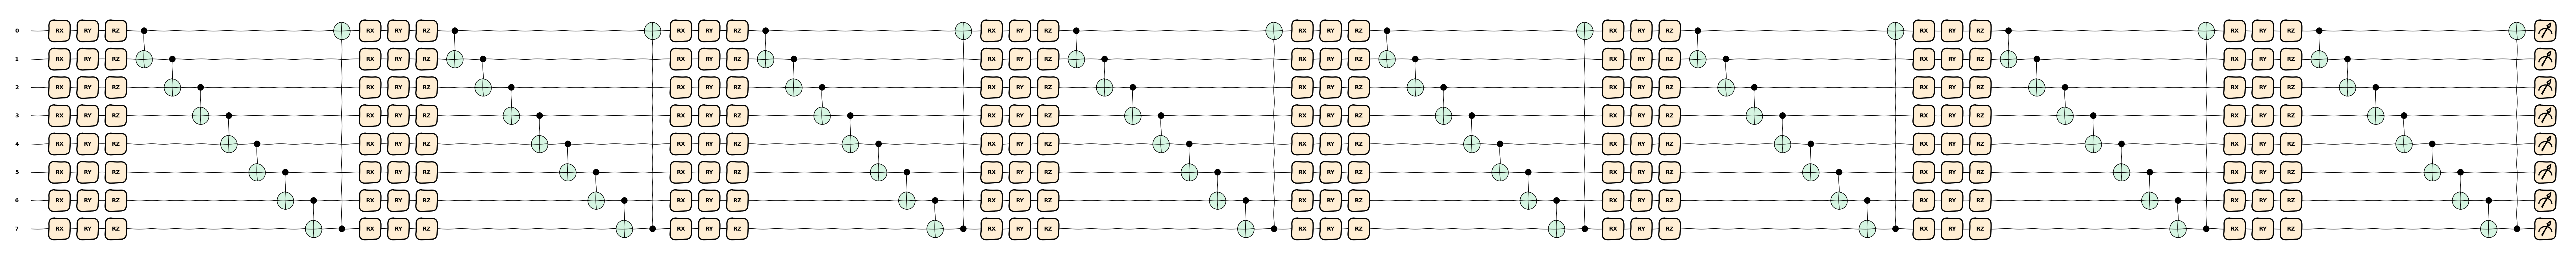

In [3]:
baseline = FullQuantumModel(qubits=8, layers=8, num_classes=4)
baseline.trainable_parameters()
baseline.draw(style='sketch')

Epoch 1/20: 100%|██████████| 270/270 [00:15<00:00, 17.52it/s, accuracy=0.922, loss=1.1] 


Time per epoch:  15.42411184310913
Epoch:  1 Loss:  1.2241060376167296
Accuracy:  0.6933449074074074
--------------------------------------------------------------------------


Epoch 2/20: 100%|██████████| 270/270 [00:15<00:00, 17.29it/s, accuracy=0.922, loss=1]    


Time per epoch:  15.61974811553955
Epoch:  2 Loss:  1.0467491297810165
Accuracy:  0.8983796296296296
--------------------------------------------------------------------------


Epoch 3/20: 100%|██████████| 270/270 [00:15<00:00, 17.05it/s, accuracy=0.891, loss=1.03] 


Time per epoch:  15.83529806137085
Epoch:  3 Loss:  0.991659841272566
Accuracy:  0.9131944444444444
--------------------------------------------------------------------------


Epoch 4/20: 100%|██████████| 270/270 [00:15<00:00, 17.04it/s, accuracy=0.828, loss=1.01] 


Time per epoch:  15.846823930740356
Epoch:  4 Loss:  0.96913667122523
Accuracy:  0.9217592592592593
--------------------------------------------------------------------------


Epoch 5/20: 100%|██████████| 270/270 [00:15<00:00, 17.04it/s, accuracy=0.969, loss=0.928]


Time per epoch:  15.844141244888306
Epoch:  5 Loss:  0.9528168060161449
Accuracy:  0.9286458333333333
--------------------------------------------------------------------------


Epoch 6/20: 100%|██████████| 270/270 [00:15<00:00, 17.10it/s, accuracy=0.891, loss=0.963]


Time per epoch:  15.78709602355957
Epoch:  6 Loss:  0.9395715263154771
Accuracy:  0.9293402777777777
--------------------------------------------------------------------------


Epoch 7/20: 100%|██████████| 270/270 [00:15<00:00, 17.11it/s, accuracy=0.953, loss=0.893]


Time per epoch:  15.780386924743652
Epoch:  7 Loss:  0.9322783774799771
Accuracy:  0.9284722222222223
--------------------------------------------------------------------------


Epoch 8/20: 100%|██████████| 270/270 [00:15<00:00, 17.77it/s, accuracy=0.953, loss=0.966]


Time per epoch:  15.190799951553345
Epoch:  8 Loss:  0.9283325875246966
Accuracy:  0.9295138888888889
--------------------------------------------------------------------------


Epoch 9/20: 100%|██████████| 270/270 [00:15<00:00, 16.88it/s, accuracy=0.969, loss=0.915]


Time per epoch:  15.995766162872314
Epoch:  9 Loss:  0.9253778336224733
Accuracy:  0.9311342592592593
--------------------------------------------------------------------------


Epoch 10/20: 100%|██████████| 270/270 [00:15<00:00, 17.10it/s, accuracy=0.953, loss=0.917]


Time per epoch:  15.788004875183105
Epoch:  10 Loss:  0.9221394876639049
Accuracy:  0.9302662037037037
--------------------------------------------------------------------------


Epoch 11/20: 100%|██████████| 270/270 [00:15<00:00, 17.13it/s, accuracy=0.922, loss=0.891]


Time per epoch:  15.76267695426941
Epoch:  11 Loss:  0.9180687332594836
Accuracy:  0.9288773148148148
--------------------------------------------------------------------------


Epoch 12/20: 100%|██████████| 270/270 [00:15<00:00, 17.09it/s, accuracy=0.953, loss=0.907]


Time per epoch:  15.802495956420898
Epoch:  12 Loss:  0.9134929831381198
Accuracy:  0.9288773148148148
--------------------------------------------------------------------------


Epoch 13/20: 100%|██████████| 270/270 [00:15<00:00, 17.37it/s, accuracy=0.938, loss=0.893]


Time per epoch:  15.544209957122803
Epoch:  13 Loss:  0.910222159491645
Accuracy:  0.9270833333333334
--------------------------------------------------------------------------


Epoch 14/20: 100%|██████████| 270/270 [00:16<00:00, 16.84it/s, accuracy=0.938, loss=0.914]


Time per epoch:  16.034032821655273
Epoch:  14 Loss:  0.9079396155145433
Accuracy:  0.9268518518518518
--------------------------------------------------------------------------


Epoch 15/20: 100%|██████████| 270/270 [00:15<00:00, 17.06it/s, accuracy=0.984, loss=0.875]


Time per epoch:  15.822717905044556
Epoch:  15 Loss:  0.9062599791420831
Accuracy:  0.9278356481481481
--------------------------------------------------------------------------


Epoch 16/20: 100%|██████████| 270/270 [00:15<00:00, 16.92it/s, accuracy=0.906, loss=0.891]


Time per epoch:  15.955806016921997
Epoch:  16 Loss:  0.9051436329329455
Accuracy:  0.9280671296296297
--------------------------------------------------------------------------


Epoch 17/20: 100%|██████████| 270/270 [00:16<00:00, 16.83it/s, accuracy=0.969, loss=0.871]


Time per epoch:  16.044273138046265
Epoch:  17 Loss:  0.9040149933762021
Accuracy:  0.9273726851851852
--------------------------------------------------------------------------


Epoch 18/20: 100%|██████████| 270/270 [00:16<00:00, 16.54it/s, accuracy=0.922, loss=0.911]


Time per epoch:  16.326967239379883
Epoch:  18 Loss:  0.9033031300262169
Accuracy:  0.9268518518518518
--------------------------------------------------------------------------


Epoch 19/20: 100%|██████████| 270/270 [00:16<00:00, 16.86it/s, accuracy=0.984, loss=0.848]


Time per epoch:  16.01896595954895
Epoch:  19 Loss:  0.9023886108839954
Accuracy:  0.9251157407407408
--------------------------------------------------------------------------


Epoch 20/20: 100%|██████████| 270/270 [00:16<00:00, 16.80it/s, accuracy=0.938, loss=0.904]


Time per epoch:  16.068276405334473
Epoch:  20 Loss:  0.9014727371710318
Accuracy:  0.924074074074074
--------------------------------------------------------------------------


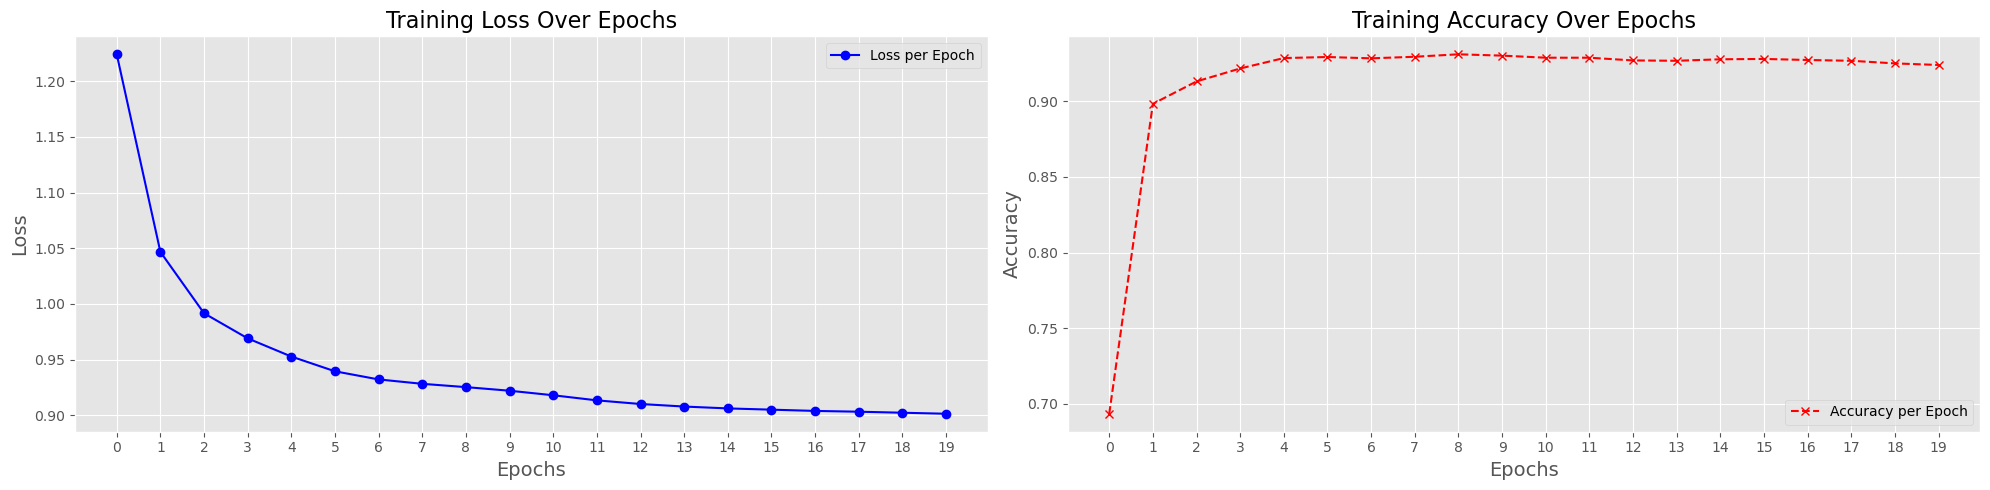

In [4]:
accuracy_history, loss_history = baseline.fit(dataloader=train_dataloader, learning_rate=0.001, epochs=20, show_plot=True)

# Baseline Evaluation

In [14]:
baseline.freeze_layers([0,1,2,3,4,5,6,7])
baseline.trainable_parameters()

#simplified per image test set evaluation
result = []
for img, label in tqdm(test_dataloader.dataset):
    img = img / torch.linalg.norm(img).view(-1, 1) #image normalization
    probs = baseline.forward(state=img) #extract probabilities
    prediction = torch.argmax(probs, dim=1)
    result.append((prediction, label))
    
def calculate_accuracy(data):
    correct = sum([1 for label, prediction in data if label == prediction])
    return correct, correct / len(data)

test_results = calculate_accuracy(result)

print(test_results[0], "elements have been correctly classified over", len(test_dataloader.dataset), "total images with an accuracy of ", test_results[1])

Trainable parameters: 0


100%|██████████| 3714/3714 [01:02<00:00, 59.24it/s]

3406 elements have been correctly classified over 3714 total images with an accuracy of  0.9170705438879914


# MCM Model 4 classes 

In [3]:
mcm_model4 = MCMQuantumModel(qubits = 8, layers = 8, ansatz='ansatz_1')

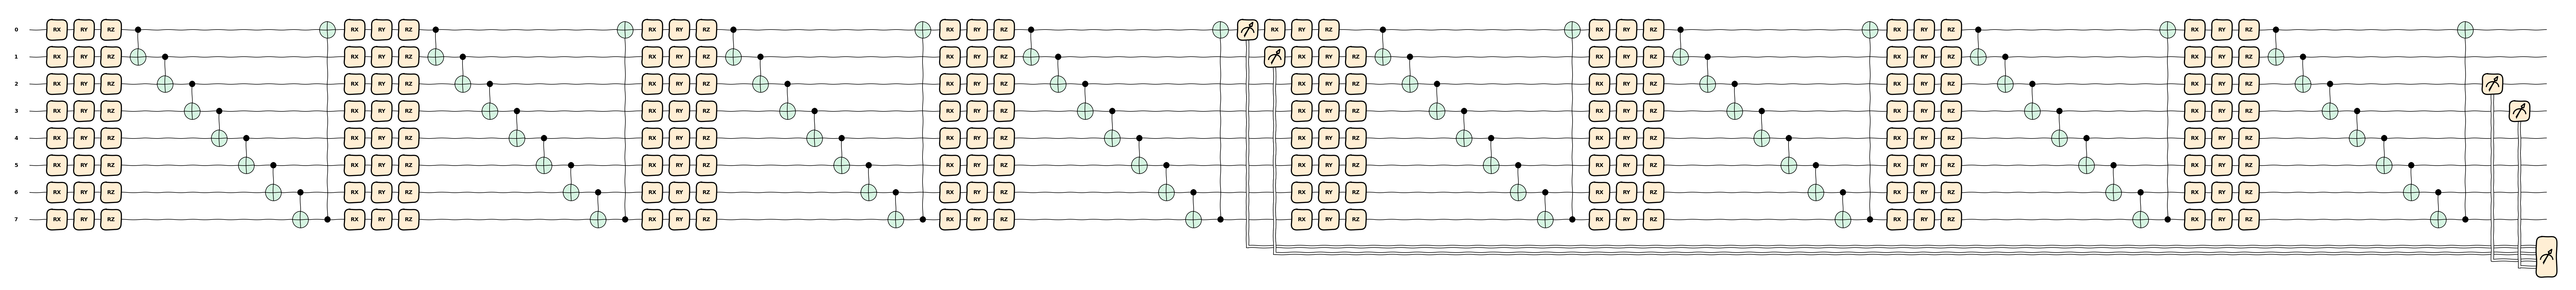

In [4]:
mcm_model4.draw(style='sketch', path='mcm_model4class')

Epoch 1/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.875, loss=2.5, mcm_accuracy=0.703] 


Time per epoch (s):  113.11425518989563
Epoch:  1 Loss:  2.6229636677989254
--------------------------------------------------------------------------
Mid circuit accuracy:  0.48292824074074076
--------------------------------------------------------------------------
Final Measurement accuracy:  0.7016203703703704
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [01:47<00:00,  2.51it/s, fm_accuracy=0.812, loss=2.39, mcm_accuracy=0.859]


Time per epoch (s):  107.77372074127197
Epoch:  2 Loss:  2.4325737158457437
--------------------------------------------------------------------------
Mid circuit accuracy:  0.7607060185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8135416666666667
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [01:45<00:00,  2.56it/s, fm_accuracy=0.844, loss=2.32, mcm_accuracy=0.875]


Time per epoch (s):  105.51016092300415
Epoch:  3 Loss:  2.3428342351207028
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8282986111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8405671296296297
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.859, loss=2.25, mcm_accuracy=0.906]


Time per epoch (s):  106.66026091575623
Epoch:  4 Loss:  2.2618933660012703
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8663773148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8499421296296297
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.828, loss=2.21, mcm_accuracy=0.859]


Time per epoch (s):  109.29764819145203
Epoch:  5 Loss:  2.22288740740882
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8984375
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8608796296296296
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [01:46<00:00,  2.54it/s, fm_accuracy=0.938, loss=2.17, mcm_accuracy=0.906]


Time per epoch (s):  106.45038199424744
Epoch:  6 Loss:  2.1989041558018436
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9153935185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8686342592592593
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [01:47<00:00,  2.52it/s, fm_accuracy=0.922, loss=2.17, mcm_accuracy=0.922]


Time per epoch (s):  107.0177149772644
Epoch:  7 Loss:  2.1812906168125292
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9202546296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8701388888888889
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [01:47<00:00,  2.51it/s, fm_accuracy=0.844, loss=2.21, mcm_accuracy=0.891]


Time per epoch (s):  107.44474411010742
Epoch:  8 Loss:  2.165375390759221
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9206597222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8837384259259259
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.891, loss=2.17, mcm_accuracy=0.859]


Time per epoch (s):  106.74964308738708
Epoch:  9 Loss:  2.15182064904107
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9222222222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8997106481481482
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.906, loss=2.14, mcm_accuracy=0.875]


Time per epoch (s):  110.49039816856384
Epoch:  10 Loss:  2.142600345611572
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9238425925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9058449074074074
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [01:54<00:00,  2.36it/s, fm_accuracy=0.891, loss=2.14, mcm_accuracy=0.922]


Time per epoch (s):  114.49109101295471
Epoch:  11 Loss:  2.136331226207592
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9237847222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.909375
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.906, loss=2.16, mcm_accuracy=0.922]


Time per epoch (s):  111.44227266311646
Epoch:  12 Loss:  2.1329493284225465
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9243634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9111689814814815
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [02:01<00:00,  2.23it/s, fm_accuracy=0.875, loss=2.17, mcm_accuracy=0.906]


Time per epoch (s):  121.16403388977051
Epoch:  13 Loss:  2.130873633314062
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9256944444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9112847222222222
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [02:00<00:00,  2.24it/s, fm_accuracy=0.938, loss=2.1, mcm_accuracy=0.922] 


Time per epoch (s):  120.73621606826782
Epoch:  14 Loss:  2.1289513729236744
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9258101851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9114583333333334
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [01:58<00:00,  2.29it/s, fm_accuracy=0.922, loss=2.15, mcm_accuracy=0.891]


Time per epoch (s):  118.13779878616333
Epoch:  15 Loss:  2.1271567344665527
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9251157407407408
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9106481481481481
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [02:02<00:00,  2.20it/s, fm_accuracy=0.922, loss=2.16, mcm_accuracy=0.922]


Time per epoch (s):  122.61680483818054
Epoch:  16 Loss:  2.1253985987769233
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9254629629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9100694444444445
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [01:56<00:00,  2.32it/s, fm_accuracy=0.906, loss=2.13, mcm_accuracy=0.906]


Time per epoch (s):  116.3172378540039
Epoch:  17 Loss:  2.123525874703019
--------------------------------------------------------------------------
Mid circuit accuracy:  0.925
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9098379629629629
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.922, loss=2.11, mcm_accuracy=0.969]


Time per epoch (s):  108.3713641166687
Epoch:  18 Loss:  2.1215795004809346
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9244791666666666
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9106481481481481
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [02:02<00:00,  2.21it/s, fm_accuracy=0.906, loss=2.13, mcm_accuracy=0.953]


Time per epoch (s):  122.00399327278137
Epoch:  19 Loss:  2.1203607506222193
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9255787037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9122106481481481
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [02:03<00:00,  2.19it/s, fm_accuracy=0.906, loss=2.18, mcm_accuracy=0.891]


Time per epoch (s):  123.2560179233551
Epoch:  20 Loss:  2.119962774382697
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9242476851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9109953703703704
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [02:04<00:00,  2.17it/s, fm_accuracy=0.922, loss=2.1, mcm_accuracy=0.891] 


Time per epoch (s):  124.41824102401733
Epoch:  21 Loss:  2.1191451690815115
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9261574074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9116898148148148
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [02:03<00:00,  2.19it/s, fm_accuracy=0.891, loss=2.17, mcm_accuracy=0.906]


Time per epoch (s):  123.49469423294067
Epoch:  22 Loss:  2.1185790203235766
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9244212962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115162037037037
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [02:02<00:00,  2.20it/s, fm_accuracy=0.906, loss=2.13, mcm_accuracy=0.953]


Time per epoch (s):  122.94917869567871
Epoch:  23 Loss:  2.1180678217499342
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9248842592592592
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9130787037037037
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [02:05<00:00,  2.16it/s, fm_accuracy=0.891, loss=2.12, mcm_accuracy=0.938]


Time per epoch (s):  125.20544481277466
Epoch:  24 Loss:  2.1177861284326625
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9251736111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9136574074074074
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [02:04<00:00,  2.17it/s, fm_accuracy=0.922, loss=2.17, mcm_accuracy=0.875]


Time per epoch (s):  124.59693598747253
Epoch:  25 Loss:  2.1175835971479064
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9254050925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9147569444444444
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [02:03<00:00,  2.19it/s, fm_accuracy=0.938, loss=2.09, mcm_accuracy=0.969]


Time per epoch (s):  123.01773190498352
Epoch:  26 Loss:  2.1171892166137694
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9241898148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9141203703703704
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [02:05<00:00,  2.15it/s, fm_accuracy=0.891, loss=2.12, mcm_accuracy=0.906]


Time per epoch (s):  125.65738081932068
Epoch:  27 Loss:  2.1165877412866663
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9247106481481482
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9173032407407408
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [02:06<00:00,  2.14it/s, fm_accuracy=0.969, loss=2.11, mcm_accuracy=0.984]


Time per epoch (s):  126.3194739818573
Epoch:  28 Loss:  2.115085891441063
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9241898148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9175347222222222
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [02:00<00:00,  2.24it/s, fm_accuracy=0.969, loss=2.12, mcm_accuracy=0.953]


Time per epoch (s):  120.63727831840515
Epoch:  29 Loss:  2.1107059567062945
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9239004629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9195023148148148
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [01:43<00:00,  2.61it/s, fm_accuracy=0.922, loss=2.05, mcm_accuracy=0.938]


Time per epoch (s):  103.41163492202759
Epoch:  30 Loss:  2.087221841017405
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9221643518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9162037037037037
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [01:43<00:00,  2.61it/s, fm_accuracy=0.875, loss=2.09, mcm_accuracy=0.875]


Time per epoch (s):  103.31376218795776
Epoch:  31 Loss:  2.0619513591130576
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9182291666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9157986111111112
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [01:43<00:00,  2.61it/s, fm_accuracy=0.859, loss=2.12, mcm_accuracy=0.906]


Time per epoch (s):  103.4117841720581
Epoch:  32 Loss:  2.0571679049068026
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9176504629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9152199074074074
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [01:44<00:00,  2.60it/s, fm_accuracy=0.953, loss=2, mcm_accuracy=0.984]   


Time per epoch (s):  104.00553798675537
Epoch:  33 Loss:  2.055717103569596
--------------------------------------------------------------------------
Mid circuit accuracy:  0.916724537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9138310185185186
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [01:47<00:00,  2.52it/s, fm_accuracy=1, loss=1.99, mcm_accuracy=0.984]    


Time per epoch (s):  107.17399978637695
Epoch:  34 Loss:  2.054800984153041
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9175925925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9139467592592593
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.922, loss=2.05, mcm_accuracy=0.891]


Time per epoch (s):  108.88239312171936
Epoch:  35 Loss:  2.053479325771332
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9176504629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9130208333333333
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.953, loss=1.99, mcm_accuracy=0.938]


Time per epoch (s):  111.3493959903717
Epoch:  36 Loss:  2.052021470334795
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9181712962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9119212962962963
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.891, loss=2.06, mcm_accuracy=0.906]


Time per epoch (s):  109.46755194664001
Epoch:  37 Loss:  2.0491859285919753
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9173611111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9127314814814815
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.922, loss=2, mcm_accuracy=0.922]   


Time per epoch (s):  109.79400897026062
Epoch:  38 Loss:  2.044467412100898
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9160300925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9156828703703703
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.906, loss=2.03, mcm_accuracy=0.859]


Time per epoch (s):  112.69781374931335
Epoch:  39 Loss:  2.0395976724448026
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9154513888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9154513888888889
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [01:53<00:00,  2.37it/s, fm_accuracy=0.953, loss=2.01, mcm_accuracy=0.969]


Time per epoch (s):  113.78396415710449
Epoch:  40 Loss:  2.035674351674539
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9123842592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9152199074074074
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.922, loss=2.02, mcm_accuracy=0.922]


Time per epoch (s):  113.25878119468689
Epoch:  41 Loss:  2.033287782139248
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9099537037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9168981481481482
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.922, loss=1.99, mcm_accuracy=0.922]


Time per epoch (s):  112.28730416297913
Epoch:  42 Loss:  2.031479804604142
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9070023148148149
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9180555555555555
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.938, loss=2.04, mcm_accuracy=0.859]


Time per epoch (s):  113.5031750202179
Epoch:  43 Loss:  2.029641871099119
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9042245370370371
--------------------------------------------------------------------------
Final Measurement accuracy:  0.919212962962963
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [01:54<00:00,  2.36it/s, fm_accuracy=0.938, loss=2.01, mcm_accuracy=0.922]


Time per epoch (s):  114.43557929992676
Epoch:  44 Loss:  2.027820200390286
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9027777777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9209490740740741
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.969, loss=2.06, mcm_accuracy=0.953]


Time per epoch (s):  113.25801301002502
Epoch:  45 Loss:  2.025795321994358
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9020254629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9226851851851852
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.922, loss=2.01, mcm_accuracy=0.938]


Time per epoch (s):  111.65560412406921
Epoch:  46 Loss:  2.024146348900265
--------------------------------------------------------------------------
Mid circuit accuracy:  0.9023726851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.924074074074074
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [01:54<00:00,  2.37it/s, fm_accuracy=0.969, loss=1.98, mcm_accuracy=0.953]


Time per epoch (s):  114.0052239894867
Epoch:  47 Loss:  2.022926124820003
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8993634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9244212962962963
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [01:54<00:00,  2.36it/s, fm_accuracy=0.969, loss=1.99, mcm_accuracy=0.938]


Time per epoch (s):  114.48468089103699
Epoch:  48 Loss:  2.021666157245636
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8987268518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9257523148148148
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [01:54<00:00,  2.35it/s, fm_accuracy=0.891, loss=2.03, mcm_accuracy=0.891]


Time per epoch (s):  114.76541304588318
Epoch:  49 Loss:  2.0208618040438053
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8964120370370371
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9256944444444445
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [01:55<00:00,  2.34it/s, fm_accuracy=0.875, loss=2.07, mcm_accuracy=0.812]


Time per epoch (s):  115.2952208518982
Epoch:  50 Loss:  2.020194524747354
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8961226851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9266782407407408
--------------------------------------------------------------------------


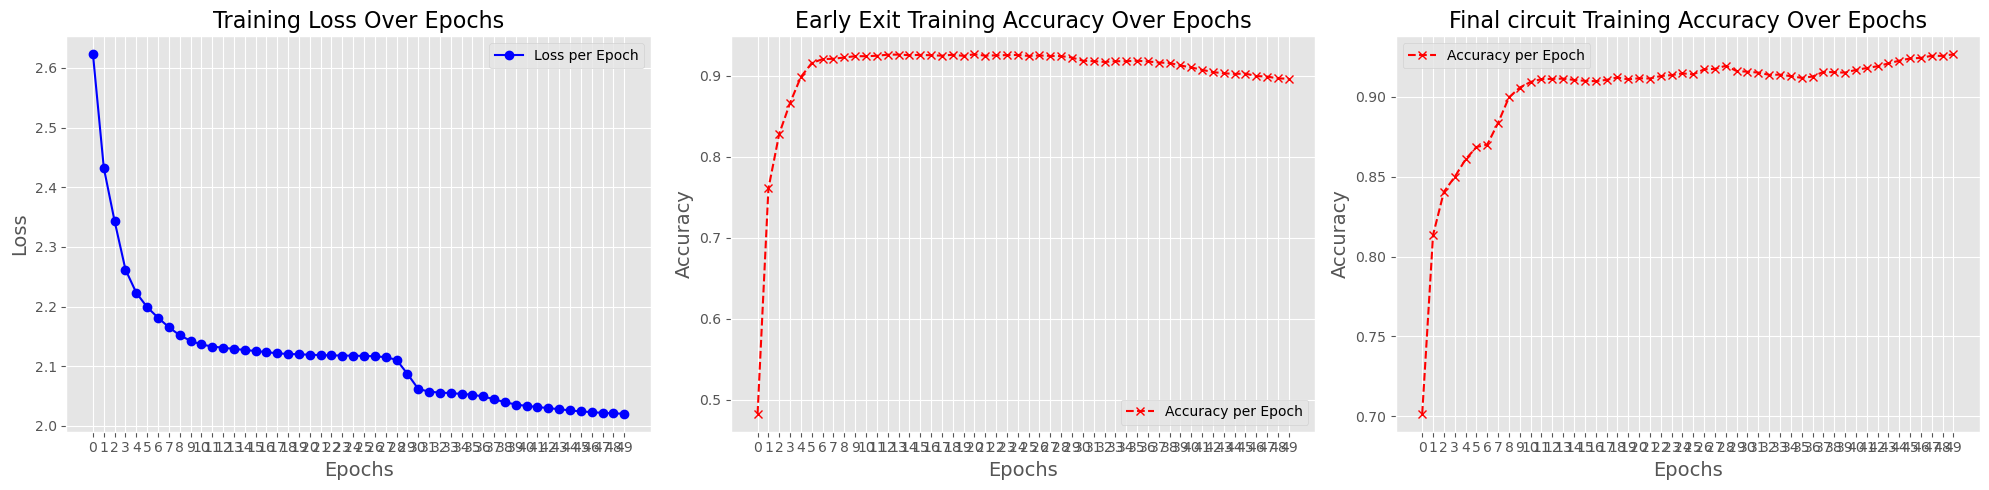

In [27]:
mcm_accuracy, fm_accuracy, loss_history = mcm_model4.fit(dataloader=train_dataloader, learning_rate=0.001, epochs=50, show_plot=True)

In [28]:
#import pickle
#model4_params = mcm_model4.params
#with open("/Users/jackvittori/Desktop/pesimcm4.pickle", "wb") as file:
#    pickle.dump(model4_params, file)

In [5]:
import pickle
with open("/Users/jackvittori/Desktop/pesimcm4.pickle", "rb") as file:
    model4_params = pickle.load(file) 

/opt/homebrew/Caskroom/miniforge/base/envs/qml/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

In [6]:
model4_params['layer_1']

Parameter containing:
tensor([[ 0.7634,  0.7996,  1.7756],
        [ 0.5189,  0.3734,  1.9691],
        [ 0.6107, -0.0800,  1.2707],
        [ 1.4566,  0.6415,  0.4296],
        [ 1.4023,  0.4532,  0.1652],
        [ 0.7784,  0.7691,  1.6271],
        [ 0.3354,  0.2860,  1.6916],
        [ 0.0613,  1.3816,  0.2851]], requires_grad=True)

In [7]:
mcm_model4.set_parameters(model4_params)
mcm_model4.params['layer_1']

Parameter containing:
tensor([[ 0.7634,  0.7996,  1.7756],
        [ 0.5189,  0.3734,  1.9691],
        [ 0.6107, -0.0800,  1.2707],
        [ 1.4566,  0.6415,  0.4296],
        [ 1.4023,  0.4532,  0.1652],
        [ 0.7784,  0.7691,  1.6271],
        [ 0.3354,  0.2860,  1.6916],
        [ 0.0613,  1.3816,  0.2851]], requires_grad=True)

## Early Exit with full-evaluation

In [8]:
prediction_results = {"early": [], "final": []}
for img, target in tqdm(test_dataloader.dataset):
    #img normalization
    img = img / torch.linalg.norm(img).view(-1, 1)
    #probs extraction
    mcm_probs, final_probs = mcm_model4.forward(state=img)
    #mcm prediction and confidence
    mcm_predictions = torch.argmax(mcm_probs, dim=1)
    mcm_correct = mcm_predictions == target
    early_confidence = mcm_probs[0,mcm_predictions]
    prediction_results["early"].append((mcm_correct, early_confidence))
    
    #fm prediction
    final_predictions = torch.argmax(final_probs, dim=1)
    final_correct = final_predictions == target
    prediction_results["final"].append((final_correct))

100%|██████████| 3714/3714 [01:27<00:00, 42.26it/s]


In [9]:
def post_evaluation_threshold(early_results, final_results, threshold):
    results = [] #chosen prediction per image
    count_1 = 0 #counter for early classified images
    count_2 = 0 #counter for final classified images
    mcm_correct = 0 #counter for correctly early classified images 
    final_correct = 0 #counter for correctly final classified images
    
    for i, (early_bool, confidence) in enumerate(early_results):
        if confidence.item() > threshold:
            results.append(early_bool.item()) #use early prediction
            count_1 += 1
            if early_bool: 
                mcm_correct += 1
        else:
            results.append(final_results[i][0].item()) #use final prediction
            count_2 += 1
            if final_results[i][0].item():
                final_correct += 1
            
    return results, mcm_correct, count_1, final_correct, count_2

In [28]:
def explain_results(results: Dict, threshold: List[float]):
    summary_data = {
        'Threshold': [],
        'Total Accuracy': [],
        'Early Classified': [],
        'Early Accuracy': [],
        'Final Classified': [],
        'Final Accuracy': []}
    
    for t in threshold:
        prediction_result, mcm_correct, n_early, final_correct, n_final = post_evaluation_threshold(results['early'], results['final'], t)
        tot_accuracy = sum([1 for i in prediction_result if i == True]) / len(prediction_result)
        
        #avoid division by 0
        early_accuracy = mcm_correct / n_early if n_early > 0 else 0
        final_accuracy = final_correct / n_final if n_final > 0 else 0

        summary_data['Threshold'].append(t)
        summary_data['Total Accuracy'].append(tot_accuracy)
        summary_data['Early Classified'].append(n_early)
        summary_data['Early Accuracy'].append(early_accuracy)
        summary_data['Final Classified'].append(n_final)
        summary_data['Final Accuracy'].append(final_accuracy)
        # print(f" tot accuracy {tot_accuracy}, average mean, {(n_early*early_accuracy + n_final*final_accuracy)/(n_early + n_final)}")
    
    df = pd.DataFrame(summary_data)
    return df

In [29]:
threshold = [round(x * 0.02 + 0.3, 2) for x in range(31)]

In [30]:
explain_results(prediction_results, threshold)

,Threshold,Total Accuracy,Early Classified,Early Accuracy,Final Classified,Final Accuracy
0,0.30,0.900377,3489,0.920034,225,0.595556
1,0.32,0.914647,3011,0.955497,703,0.739687
2,0.34,0.925956,2431,0.983135,1283,0.817615
3,0.36,0.926494,1762,0.996027,1952,0.863730
4,0.38,0.925687,1119,0.997319,2595,0.894798
5,0.40,0.925687,607,0.996705,3107,0.911812
6,0.42,0.925687,271,1.000000,3443,0.919837
7,0.44,0.925687,96,1.000000,3618,0.923715
8,0.46,0.925687,16,1.000000,3698,0.925365
9,0.48,0.925687,0,0.000000,3714,0.925687


# Early Exit without full execution

In [31]:
def early_evaluation_utils(params: Dict, state: torch.Tensor = None): 
    first_pair = [0,1]
    measurements = []
    if state is not None:
        # state vector initialization with input
        qml.QubitStateVector(state, wires=range(8))
    for i in range(4):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])
    
    for w in first_pair: 
        measurements.append(qml.measure(wires=w)) #measure first pair of qubits
    return measurements

def fully_evaluation_utils(params: Dict, state: torch.Tensor = None):
    first_pair = [0,1]
    second_pair = [2,3]
    mcasurements = []
    if state is not None:
        # state vector initialization with input
        qml.QubitStateVector(state, wires=range(8))
    for i in range(4):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])
            
    for w in first_pair: 
        mcasurements.append(qml.measure(wires=w)) #measure first pair of qubits

    for i in range(4, 8):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])

    for w in second_pair:
        mcasurements.append(qml.measure(wires=w))

    return mcasurements

In [32]:
dev = qml.device("default.qubit", wires=8)
@qml.qnode(dev)  
def early_evaluation_ansatz(params: Dict, state: torch.Tensor = None):
    early_measurement = early_evaluation_utils(params=params, state=state)
    return qml.probs(op=early_measurement)

@qml.qnode(dev)
def fully_evaluation_ansatz(params: Dict, state: torch.Tensor = None):
    measurements = fully_evaluation_utils(params=params, state=state)
    mid_measurement = measurements[:2]
    final_measurement = measurements[2:]
    return qml.probs(op=mid_measurement), qml.probs(op=final_measurement)

In [33]:
parameters4classes = mcm_model4.params

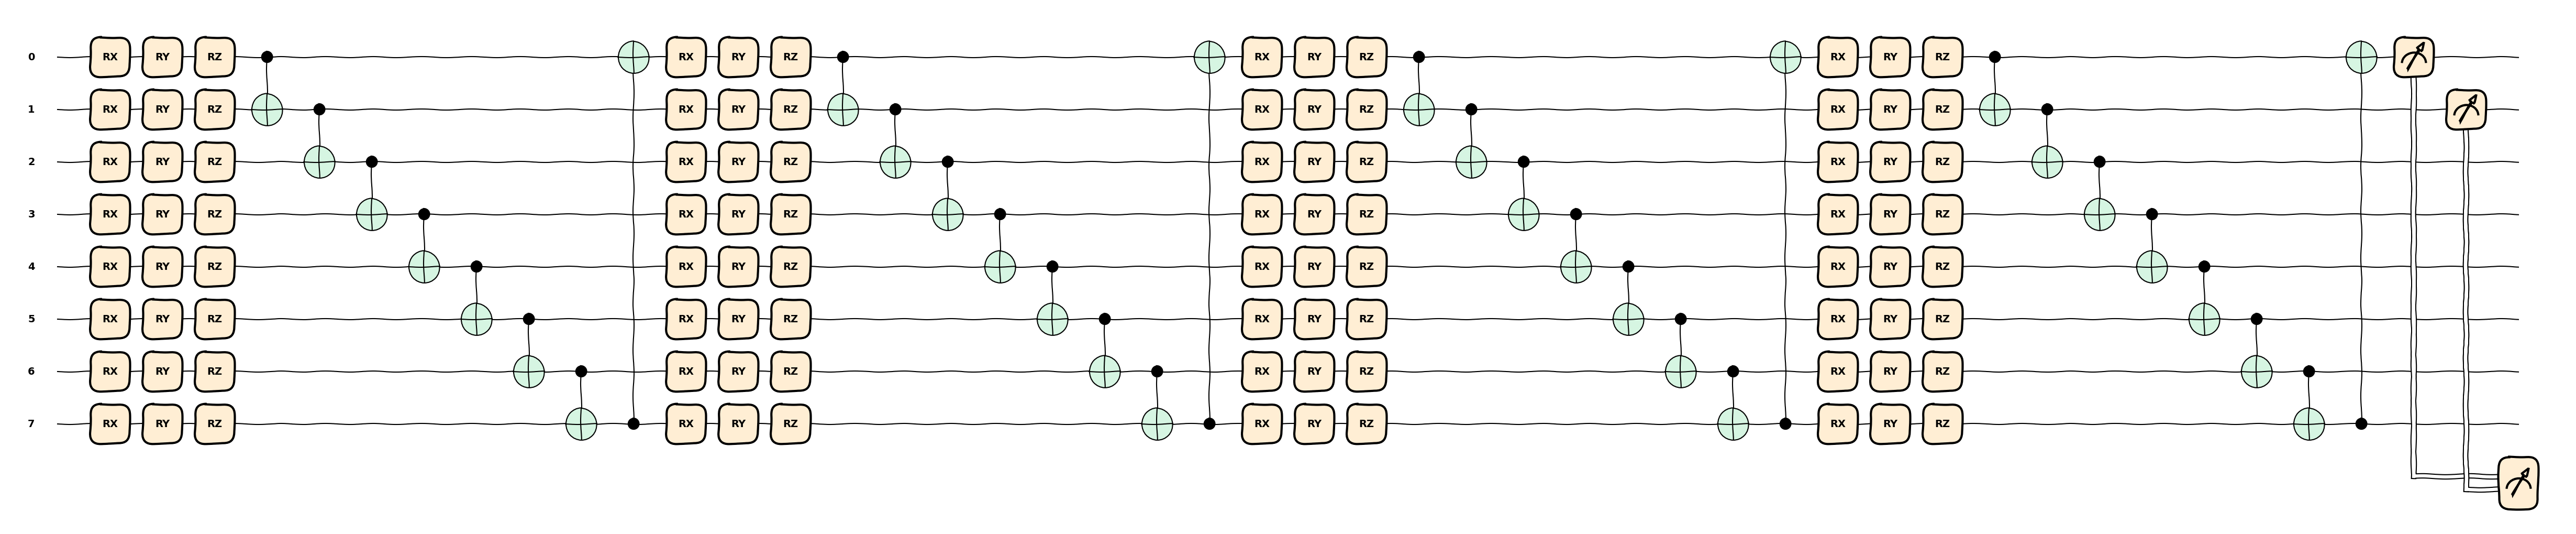

In [34]:
early_evaluate_model, ax1 = qml.draw_mpl(early_evaluation_ansatz)(parameters4classes)

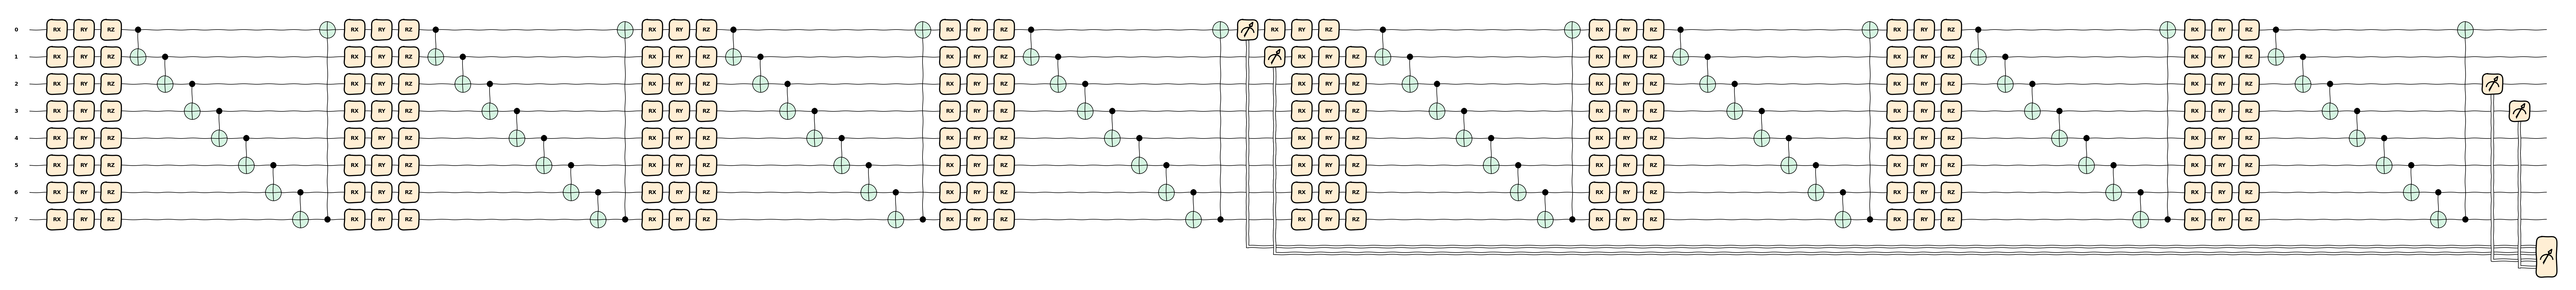

In [35]:
final_evaluate_model, ax2 = qml.draw_mpl(fully_evaluation_ansatz)(parameters4classes)

## Evaluation Routine Definition

In [43]:
def evaluation_routine(dataloader: DataLoader, parameters: Dict, threshold: float):
    
    evaluation_results = []
    count_1 = 0 #counter for early classified images
    count_2 = 0 #counter for final classified images
    early_correct = 0 #counter for correctly early classified images 
    final_correct = 0 #counter for correctly final classified images
    for img, target in dataloader.dataset:
        #img normalization
        img = img / torch.linalg.norm(img).view(-1, 1)
        
        #mid circuit evaluation
        early_probs = early_evaluation_ansatz(params=parameters, state=img)
        early_prediction = torch.argmax(early_probs, dim=1)
        confidence = early_probs[0, early_prediction].item()
        if confidence >= threshold:
            early_guess = early_prediction == target
            evaluation_results.append(early_guess.item())
            count_1 += 1
            if early_guess: 
                early_correct += 1
            
        else: 
            final_probs = fully_evaluation_ansatz(params=parameters, state=img)
            early_full, final_full = final_probs
            final_predictions = torch.argmax(final_full, dim=1)
            final_guess = final_predictions == target
            evaluation_results.append(final_guess.item())
            count_2 += 1
            if final_guess: 
                final_correct += 1
    total_accuracy = sum([1 for i in evaluation_results if i == True])/len(evaluation_results)
    early_accuracy = early_correct/count_1 if count_1 > 0 else 0
    final_accuracy = final_correct/count_2 if count_2 > 0 else 0
    
    return total_accuracy, early_accuracy, count_1, final_accuracy, count_2

In [44]:
def explain_evaluation(dataloader: DataLoader, parameters: Dict, threshold: List[float]):
    summary_data = {
    'Threshold': [],
    'Total Accuracy': [],
    'Early Classified': [],
    'Early Accuracy': [],
    'Final Classified': [],
    'Final Accuracy': []}
    
    for t in tqdm(threshold):
        tot_acc, early_acc, early_count, final_acc, final_count = evaluation_routine(dataloader, parameters, t)
        summary_data['Threshold'].append(t)
        summary_data['Total Accuracy'].append(tot_acc)
        summary_data['Early Classified'].append(early_count)
        summary_data['Early Accuracy'].append(early_acc)
        summary_data['Final Classified'].append(final_count)
        summary_data['Final Accuracy'].append(final_acc)
        
    df = pd.DataFrame(summary_data)
    return df

In [45]:
threshold = [round(x * 0.02 + 0.3, 2) for x in range(31)]
explain_evaluation(test_dataloader, parameters4classes, threshold)

100%|██████████| 31/31 [1:00:01<00:00, 116.18s/it]


,Threshold,Total Accuracy,Early Classified,Early Accuracy,Final Classified,Final Accuracy
0,0.30,0.900377,3489,0.920034,225,0.595556
1,0.32,0.914647,3011,0.955497,703,0.739687
2,0.34,0.925956,2431,0.983135,1283,0.817615
3,0.36,0.926494,1762,0.996027,1952,0.863730
4,0.38,0.925687,1119,0.997319,2595,0.894798
5,0.40,0.925687,607,0.996705,3107,0.911812
6,0.42,0.925687,271,1.000000,3443,0.919837
7,0.44,0.925687,96,1.000000,3618,0.923715
8,0.46,0.925687,16,1.000000,3698,0.925365
9,0.48,0.925687,0,0.000000,3714,0.925687
